In [52]:
import pandas as pd 
import numpy as np 

import seaborn as sns
import matplotlib.pyplot as plt 

from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, SGDRegressor, Lasso, Ridge
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split

In [5]:
df = pd.read_csv('car_price_prediction_.csv')

In [3]:
df.head()

,Car ID,Brand,Year,Engine Size,Fuel Type,Transmission,Mileage,Condition,Price,Model
0,1,Tesla,2016,2.3,Petrol,Manual,114832,New,26613.92,Model X
1,2,BMW,2018,4.4,Electric,Manual,143190,Used,14679.61,5 Series
2,3,Audi,2013,4.5,Electric,Manual,181601,New,44402.61,A4
3,4,Tesla,2011,4.1,Diesel,Automatic,68682,New,86374.33,Model Y
4,5,Ford,2009,2.6,Diesel,Manual,223009,Like New,73577.10,Mustang


In [4]:
df.tail()

,Car ID,Brand,Year,Engine Size,Fuel Type,Transmission,Mileage,Condition,Price,Model
2495,2496,Audi,2020,2.4,Petrol,Automatic,22650,Like New,61384.10,Q5
2496,2497,Audi,2001,5.7,Hybrid,Manual,77701,Like New,24710.35,A3
2497,2498,Ford,2021,1.1,Hybrid,Manual,272827,Like New,29902.45,Fiesta
2498,2499,Audi,2002,4.5,Diesel,Manual,229164,Like New,46085.67,Q5
2499,2500,Toyota,2005,4.6,Diesel,Automatic,80978,Used,16594.14,RAV4


In [5]:
df.shape

(2500, 10)

In [6]:
df.value_counts()

Car ID  Brand     Year  Engine Size  Fuel Type  Transmission  Mileage  Condition  Price     Model   
2500    Toyota    2005  4.6          Diesel     Automatic     80978    Used       16594.14  RAV4        1
1       Tesla     2016  2.3          Petrol     Manual        114832   New        26613.92  Model X     1
2       BMW       2018  4.4          Electric   Manual        143190   Used       14679.61  5 Series    1
3       Audi      2013  4.5          Electric   Manual        181601   New        44402.61  A4          1
2484    Mercedes  2014  2.9          Diesel     Manual        91820    New        81838.19  GLA         1
                                                                                                       ..
9       Honda     2023  5.7          Electric   Manual        120360   Like New   15905.62  Civic       1
8       Tesla     2017  5.3          Hybrid     Automatic     83030    New        17381.19  Model Y     1
7       Audi      2020  4.0          Electric   Aut

In [8]:
df.describe()

,Car ID,Year,Engine Size,Mileage,Price
count,2500.00000,2500.0000,2500.000000,2500.000000,2500.000000
mean,1250.50000,2011.6268,3.465240,149749.844800,52638.022532
std,721.83216,6.9917,1.432053,87919.952034,27295.833455
min,1.00000,2000.0000,1.000000,15.000000,5011.270000
25%,625.75000,2005.0000,2.200000,71831.500000,28908.485000
50%,1250.50000,2012.0000,3.400000,149085.000000,53485.240000
75%,1875.25000,2018.0000,4.700000,225990.500000,75838.532500
max,2500.00000,2023.0000,6.000000,299967.000000,99982.590000


In [9]:
df.isna().sum()

Car ID          0
Brand           0
Year            0
Engine Size     0
Fuel Type       0
Transmission    0
Mileage         0
Condition       0
Price           0
Model           0
dtype: int64

In [32]:
df = df.dropna()

In [26]:
df.dtypes

Car ID            int64
Brand            object
Year              int64
Engine Size     float64
Fuel Type        object
Transmission    float64
Mileage           int64
Condition        object
Price           float64
Model            object
dtype: object

In [27]:
df.drop(columns=['Car ID'], inplace=True)

In [28]:
df.head()

,Brand,Year,Engine Size,Fuel Type,Transmission,Mileage,Condition,Price,Model


In [29]:
df.isnull()

,Brand,Year,Engine Size,Fuel Type,Transmission,Mileage,Condition,Price,Model


In [30]:
df.duplicated().sum()

np.int64(0)

In [31]:
df['Brand'].value_counts()

Series([], Name: count, dtype: int64)

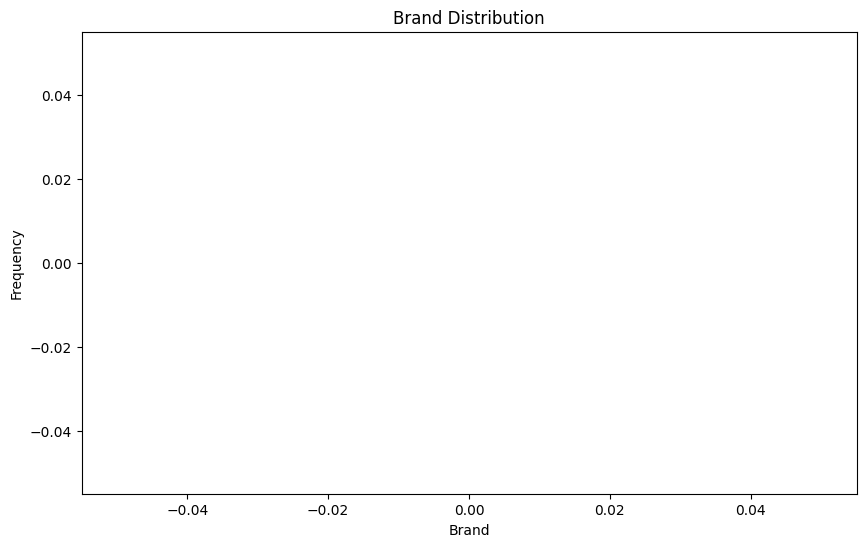

In [36]:
plt.figure(figsize=(10, 6))
plt.bar(df['Brand'].value_counts().index, df['Brand'].value_counts().values, color='green')
plt.title('Brand Distribution')
plt.xlabel('Brand')
plt.ylabel('Frequency')

plt.show()

In [7]:
X = df.drop(columns=['Price'])
y = df['Price']

In [8]:
X

,Car ID,Brand,Year,Engine Size,Fuel Type,Transmission,Mileage,Condition,Model
0,1,Tesla,2016,2.3,Petrol,Manual,114832,New,Model X
1,2,BMW,2018,4.4,Electric,Manual,143190,Used,5 Series
2,3,Audi,2013,4.5,Electric,Manual,181601,New,A4
3,4,Tesla,2011,4.1,Diesel,Automatic,68682,New,Model Y
4,5,Ford,2009,2.6,Diesel,Manual,223009,Like New,Mustang
...,...,...,...,...,...,...,...,...,...
2495,2496,Audi,2020,2.4,Petrol,Automatic,22650,Like New,Q5
2496,2497,Audi,2001,5.7,Hybrid,Manual,77701,Like New,A3
2497,2498,Ford,2021,1.1,Hybrid,Manual,272827,Like New,Fiesta
2498,2499,Audi,2002,4.5,Diesel,Manual,229164,Like New,Q5


In [9]:
y

0       26613.92
1       14679.61
2       44402.61
3       86374.33
4       73577.10
          ...   
2495    61384.10
2496    24710.35
2497    29902.45
2498    46085.67
2499    16594.14
Name: Price, Length: 2500, dtype: float64

In [10]:
df.head()

,Car ID,Brand,Year,Engine Size,Fuel Type,Transmission,Mileage,Condition,Price,Model
0,1,Tesla,2016,2.3,Petrol,Manual,114832,New,26613.92,Model X
1,2,BMW,2018,4.4,Electric,Manual,143190,Used,14679.61,5 Series
2,3,Audi,2013,4.5,Electric,Manual,181601,New,44402.61,A4
3,4,Tesla,2011,4.1,Diesel,Automatic,68682,New,86374.33,Model Y
4,5,Ford,2009,2.6,Diesel,Manual,223009,Like New,73577.10,Mustang


In [12]:
X.head()

,Car ID,Brand,Year,Engine Size,Fuel Type,Transmission,Mileage,Condition,Model
0,1,Tesla,2016,2.3,Petrol,Manual,114832,New,Model X
1,2,BMW,2018,4.4,Electric,Manual,143190,Used,5 Series
2,3,Audi,2013,4.5,Electric,Manual,181601,New,A4
3,4,Tesla,2011,4.1,Diesel,Automatic,68682,New,Model Y
4,5,Ford,2009,2.6,Diesel,Manual,223009,Like New,Mustang


In [14]:
y.head()

0    26613.92
1    14679.61
2    44402.61
3    86374.33
4    73577.10
Name: Price, dtype: float64

In [16]:
encoder = LabelEncoder()
X['Brand'] = encoder.fit_transform(X['Brand'])
X['Model'] = encoder.fit_transform(X['Model'])
X['Fuel Type'] = encoder.fit_transform(df['Fuel Type'])
X['Transmission'] = encoder.fit_transform(df['Transmission'])
X['Condition'] = encoder.fit_transform(df['Condition'])
X['Model'] = encoder.fit_transform(df['Model'])
X.head()

,Car ID,Brand,Year,Engine Size,Fuel Type,Transmission,Mileage,Condition,Model
0,1,5,2016,2.3,3,1,114832,1,19
1,2,1,2018,4.4,1,1,143190,2,1
2,3,0,2013,4.5,1,1,181601,1,3
3,4,5,2011,4.1,0,0,68682,1,20
4,5,2,2009,2.6,0,1,223009,0,21


In [17]:
X.shape

(2500, 9)

In [18]:
y.shape

(2500,)

In [19]:
scaler = MinMaxScaler()

X['Mileage'] = scaler.fit_transform(X[['Mileage']])

In [20]:
X

,Car ID,Brand,Year,Engine Size,Fuel Type,Transmission,Mileage,Condition,Model
0,1,5,2016,2.3,3,1,0.382785,1,19
1,2,1,2018,4.4,1,1,0.477326,2,1
2,3,0,2013,4.5,1,1,0.605384,1,3
3,4,5,2011,4.1,0,0,0.228927,1,20
4,5,2,2009,2.6,0,1,0.743432,0,21
...,...,...,...,...,...,...,...,...,...
2495,2496,0,2020,2.4,3,0,0.075462,0,23
2496,2497,0,2001,5.7,2,1,0.258995,0,2
2497,2498,2,2021,1.1,2,1,0.909519,0,12
2498,2499,0,2002,4.5,0,1,0.763952,0,23


In [22]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.8, shuffle=True, random_state=42)

In [23]:
X_train.shape

(2000, 9)

In [24]:
X_test.shape

(500, 9)

In [25]:
y_train.shape

(2000,)

In [26]:
y_test.shape

(500,)

In [27]:
X_test

,Car ID,Brand,Year,Engine Size,Fuel Type,Transmission,Mileage,Condition,Model
1447,1448,3,2010,3.0,0,1,0.706276,0,13
1114,1115,5,2020,4.4,2,1,0.062563,0,17
1064,1065,6,2013,4.3,0,1,0.185136,0,25
2287,2288,6,2006,3.0,2,0,0.656435,2,7
1537,1538,1,2016,5.5,3,0,0.225866,0,1
...,...,...,...,...,...,...,...,...,...
2375,2376,3,2000,5.8,1,0,0.454759,0,13
1609,1610,3,2019,5.8,2,1,0.999237,0,6
596,597,3,2010,3.8,1,0,0.670937,2,8
84,85,4,2018,4.5,3,0,0.194915,0,16


In [28]:
X_train

,Car ID,Brand,Year,Engine Size,Fuel Type,Transmission,Mileage,Condition,Model
2055,2056,4,2005,3.4,1,0,0.244659,1,5
1961,1962,1,2004,1.6,0,1,0.840865,1,1
1864,1865,5,2002,5.8,0,1,0.299605,0,19
2326,2327,4,2000,4.6,0,1,0.917874,1,16
461,462,3,2010,3.2,0,1,0.137272,0,6
...,...,...,...,...,...,...,...,...,...
1638,1639,3,2018,4.9,3,1,0.230227,2,4
1095,1096,4,2005,2.9,3,1,0.425088,0,15
1130,1131,6,2014,3.2,0,1,0.268780,0,25
1294,1295,2,2011,4.8,3,1,0.021073,2,11


In [29]:
y_test

1447    17494.90
1114    75919.94
1064    87474.10
2287    13522.58
1537    77070.57
          ...   
2375    18249.22
1609    94121.24
596     72013.84
84      84585.18
2213    16960.31
Name: Price, Length: 500, dtype: float64

In [30]:
y_train

2055    97600.01
1961     9212.70
1864    89909.81
2326    38235.97
461     77675.22
          ...   
1638    73142.61
1095    82138.86
1130    74003.92
1294    14457.06
860     34382.84
Name: Price, Length: 2000, dtype: float64

In [46]:
from xgboost import XGBRegressor

model = XGBRegressor(n_estimators=500, learning_rate=0.05, max_depth=4, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [47]:
model.fit(X_train,y_train)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [48]:
y_pred = model.predict(X_test)

In [49]:
y_pred

array([65337.586, 44543.08 , 54126.887, 47930.24 , 43298.633, 34383.42 ,
       44746.56 , 47453.777, 57472.812, 64899.285, 70718.12 , 51521.777,
       55367.047, 37798.723, 40998.902, 49377.48 , 56757.465, 61686.793,
       44075.02 , 54875.203, 54408.332, 38469.465, 46877.348, 57852.914,
       49927.695, 51212.734, 58310.867, 54714.277, 43510.79 , 69870.14 ,
       52367.42 , 22348.533, 53237.734, 43513.64 , 43739.586, 46941.99 ,
       55126.918, 38006.344, 62845.344, 48540.12 , 50292.94 , 51487.953,
       52064.605, 48294.715, 49828.098, 47502.945, 46252.086, 71567.58 ,
       47028.613, 52671.492, 33085.824, 56223.88 , 63256.305, 45242.062,
       50930.297, 56242.08 , 51686.63 , 47952.766, 46258.523, 52272.973,
       58400.66 , 50622.688, 65991.63 , 42796.28 , 59387.44 , 48630.12 ,
       69665.35 , 51776.312, 50548.473, 65645.3  , 46925.168, 62393.52 ,
       66859.63 , 54734.38 , 63371.1  , 44962.51 , 59138.836, 43949.086,
       52617.16 , 52529.703, 37698.76 , 54908.125, 

In [50]:
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
from sklearn.metrics import mean_absolute_error, r2_score

print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

Mean Absolute Error: 24768.0562746875
Mean Absolute Error (MAE): 24768.0562746875
R² Score: -0.12193941462190971


In [53]:
lasso = Lasso()

lasso.fit(X_train, y_train)

,alpha,1.0
,fit_intercept,True
,precompute,False
,copy_X,True
,max_iter,1000
,tol,0.0001
,warm_start,False
,positive,False
,random_state,None
,selection,'cyclic'


In [54]:
y_pred = lasso.predict(X_test)

In [55]:
y_pred

array([54691.1318295 , 50587.49799585, 52763.35541068, 53255.8752468 ,
       51160.51919671, 51859.02962179, 50367.30706349, 53045.568044  ,
       54114.25566144, 53275.91350502, 53732.66934034, 51125.84268365,
       53139.82938743, 54261.03045456, 50708.90696041, 50832.60804773,
       53188.91707562, 54131.70811571, 50714.00974607, 54506.74553385,
       50626.34844551, 51628.89640015, 50463.77269766, 52517.91852846,
       50147.27571053, 50510.9107934 , 54467.40194071, 51351.71806615,
       53371.36465018, 52722.8479922 , 51245.42632024, 52809.04236043,
       53012.16506558, 52086.95123217, 53158.56106407, 50663.74405554,
       50153.3940988 , 51178.77348837, 50301.33904036, 54476.55220748,
       52127.85397158, 53516.1553842 , 56426.17965707, 51169.67697375,
       51230.28916204, 52199.32670522, 51061.49972649, 53213.6733459 ,
       52919.4337954 , 51412.86326706, 54403.94929526, 53770.16057005,
       50028.64649037, 54309.1517552 , 55312.34637863, 49350.61656613,
      

In [56]:
print(mean_absolute_error(y_test, y_pred))

23691.642655674867


In [57]:
ridge = Ridge()

ridge.fit(X_train, y_train)

,alpha,1.0
,fit_intercept,True
,copy_X,True
,max_iter,None
,tol,0.0001
,solver,'auto'
,positive,False
,random_state,None


In [58]:
y_pred = ridge.predict(X_test)

In [59]:
y_pred

array([54692.32163599, 50593.38288117, 52768.6385113 , 53250.75516027,
       51162.4070853 , 51856.66590324, 50368.1672954 , 53046.05533862,
       54110.34254372, 53274.03722427, 53731.593341  , 51127.1714238 ,
       53140.92919715, 54264.15505267, 50703.79137752, 50828.5072404 ,
       53186.46658682, 54135.1070645 , 50716.88397533, 54509.00798515,
       50624.90938162, 51625.12606003, 50460.27111093, 52517.90291351,
       50140.64176422, 50513.01503584, 54470.07153723, 51351.80035168,
       53366.09674337, 52716.4503903 , 51245.15525431, 52806.66533224,
       53009.33135201, 52087.70973818, 53159.4773653 , 50668.3725524 ,
       50157.15832536, 51180.78710369, 50297.2650471 , 54481.19727734,
       52129.96967514, 53524.57387232, 56420.71291624, 51173.86396608,
       51234.02566823, 52198.48891365, 51057.73293077, 53214.73722808,
       52922.38349294, 51413.52644928, 54409.38556553, 53770.73434811,
       50027.96327793, 54312.71092175, 55311.55161934, 49346.4976944 ,
      

In [60]:
print(mean_absolute_error(y_test, y_pred))

23691.651035395593


In [ ]:
# print(mean_squared_error(y_test, y_pred))

759490673.3062897
